<a href="https://colab.research.google.com/github/9M3a1h3d9i9/karatsuba-VS-Normal-Mul/blob/main/KARATSUBA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **In the name of GOD**

The Project of **Design and Analysing for Algorithms** , Subject of project is Analysiation of Multiplication Third grade algorithm O(n3) VS Multiplicaion KURATSUBA algorithms.


**Master Names:** Dr.M.SALAHI

**Student Names:** Mohammad Mahdi Shafighi

**Field of Study:**  Computer Science

**Academic year:** 1402

**Gilan University**


# Imports

In [1]:
import timeit
import random
import math
import matplotlib.pyplot as plt
import numpy as np

# Create a Random numbers

In [2]:
l1, l2, tl1, tl2 = list(), list(), list(), list()
for i in range(100):
  for j in range(10**i,(10**i+1)):
    l1.append(random.randint(0,j)*random.randint(0,j))
    l2.append(random.randint(0,j)*random.randint(0,j))

# **Normal Multiplication**

In [3]:
def Multiplication(x, y):
  return x * y

# third grade algorithm O(n^3)

In [4]:
import functools


def counted(fn):
    # Counter Decorator
    def wrapper(*args, **kwargs):
        if "" in args or " " in args:
            return "".join(map(lambda s: s.strip(), args))
        wrapper.called += 1
        return fn(*args, **kwargs)
    wrapper.called = 0
    wrapper.__name__ = fn.__name__
    return wrapper


@counted
def prod(x, y):
    # x, y are strings --> returns a string of x*y
    return str(eval("%s * %s" % (x, y)))


@counted
def suma(x, y):
    # x, y are strings --> returns a string of x+y
    return str(eval("%s + %s" % (x, y)))


def one_to_n_product(d, x):
    """d is a single digit, x is n-digit --> returns a string of d*x
    """
    result = ""
    carry = "0"
    for i, digit in enumerate(reversed(x)):
        r = suma(prod(d, digit), carry)
        carry, digit = r[:-1], r[-1]
        result = digit + result
    return carry + result


def sum_middle_products(middle_products):
    # middle_products is a list of strings --> returns a string
    max_length = max([len(md) for md in middle_products])
    for i, md in enumerate(middle_products):
        middle_products[i] = " " * (max_length - len(md)) + md
    carry = "0"
    result = ""
    for i in range(1, max_length + 1):
        row = [carry] + [md[-i] for md in middle_products]
        r = functools.reduce(suma, row)
        carry, digit = r[:-1], r[-1]
        result = digit + result
    return carry + result


def algorithm(x, y):
    # x, y are integers --> returns an integer, x*y
    x, y = str(x), str(y)
    middle_products = []
    for i, digit in enumerate(reversed(y)):
        middle_products.append(one_to_n_product(digit, x) + " " * i)
    return int(sum_middle_products(middle_products))

# ***Karatsuba Recursive Algorithms***

In [5]:
def karatsuba(x, y):
    if x < 10 or y < 10:
        return x * y
    else:
        n = max(len(str(x)), len(str(y)))
        half = n // 2
        a = x // (10 ** (half))  # left part of x
        b = x % (10 ** (half))  # right part of x
        c = y // (10 ** (half))  # left part of y
        d = y % (10 ** (half))  # right part of y
        ac = karatsuba(a, c)
        bd = karatsuba(b, d)
        ad_plus_bc = karatsuba(a+b, c+d)-ac-bd
        return ac * (10 ** (2 * half)) + (ad_plus_bc * (10 ** half)) + bd

# Time Calculating

In [6]:
for i in range(len(l1)):
  starting_time = timeit.default_timer()
  karatsuba(l1[i],l2[i])
  # print("time difference:", timeit.default_timer()-starting_time)
  ending_time = timeit.default_timer()
  tl1.append(ending_time - starting_time)
print(tl1)
print(len(tl1))

[2.8080000049612863e-06, 7.149999987632327e-07, 1.551200000449171e-05, 3.4859999999525826e-05, 3.461700001139434e-05, 0.00010046299999544317, 0.00012546700000370947, 0.00017571399999383175, 0.00017725399999335423, 0.00024224999998523344, 0.00024646299999631083, 0.0002954130000034638, 0.00043289999999274187, 0.0003968320000069525, 0.00048296700001060344, 0.0034549369999865576, 0.0005353880000029676, 0.000719212000007019, 0.0008913650000010875, 0.0008267979999914132, 0.0009017010000036407, 0.0010825210000007246, 0.0010149459999979626, 0.0012335280000002058, 0.0011603859999809174, 0.0010127740000029917, 0.0010026059999859172, 0.0010033229999919513, 0.0010655709999980445, 0.0011084630000084417, 0.0011607760000060807, 0.0012440870000034465, 0.0013560399999903439, 0.0014720030000034967, 0.0015550420000067788, 0.0016182729999911771, 0.0016940569999803756, 0.0018490440000107355, 0.001832675000002837, 0.0020665520000022752, 0.0019950159999950756, 0.002114948000013328, 0.0021185599999853366, 0.0

In [7]:
for j in range(len(l1)):
  starting_time = timeit.default_timer()

  algorithm(l1[j], l2[j])

  ending_time = timeit.default_timer()
  tl2.append(ending_time - starting_time)
print(tl2)
print(len(tl2))

[7.956600001080005e-05, 5.8487000018203616e-05, 0.0006381270000019867, 0.0010476339999740958, 0.0014091619999874183, 0.007327965000001768, 0.003957581999998183, 0.00627485299997943, 0.008480327000000898, 0.005752594999989924, 0.00643825999998171, 0.008100301000013133, 0.010205476999999519, 0.011464395999979615, 0.013264165999999022, 0.015867690999982642, 0.017855468999982804, 0.018307112000002235, 0.022356918000014048, 0.03444676600000207, 0.027006650999993553, 0.02878945200001226, 0.03236836100001028, 0.04146048999999152, 0.03955817799999295, 0.04970038999999815, 0.04841030999997997, 0.05590196299999661, 0.0625829380000198, 0.05902504299999123, 0.05957295599998247, 0.07018402700001047, 0.07051430699999628, 0.07250044599999228, 0.0841045380000196, 0.08570430200001056, 0.0920278349999819, 0.10502574299999878, 0.10191486600001554, 0.12301898500001585, 0.12531191099998296, 0.11299839200000861, 0.13322259599999597, 0.1300303650000103, 0.13628010499999732, 0.15068683399999827, 0.15956905400

In [8]:
x1, x2 = [], []
for i in range(len(tl1)):
  x1.append(i)
for j in range(len(tl2)):
  x2.append(j)

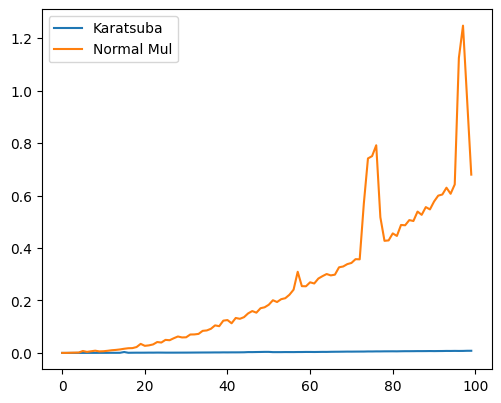

In [9]:
 fig = plt.figure(figsize=(5,4), dpi=100)
 axes = fig.add_axes( [0.1, 0.1, 0.9, 0.9] )

axes.plot(x1, tl1, label="Karatsuba")
axes.plot(x2, tl2, label="Normal Mul")

axes.legend(loc=0)

plt.show()
